**AEROFIT ANALYSIS**

About Aerofit :- Aerofit is a leading brand of fitness equipment that provides a wide range of machines and accessories to meet the needs of people of all fitness levels. Aerofit was founded in 1998 by Sachdev Sports Co., with the mission of providing high-quality fitness equipment at affordable prices.Aerofit offers a variety of financing options to make it easy for customers to purchase their fitness equipment.

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

* For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


**Dataset**

link: Aerofit_treadmill.csv   

Product Purchased:	KP281, KP481, or KP781    
Age:	In years     
Gender:	Male/Female    
Education:	In years     
MaritalStatus:	Single or partnered     
Usage:	The average number of times the customer plans to use the treadmill each week.     
Income:	Annual income (in $)     
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.     
Miles:	The average number of miles the customer expects to walk/run each week.       

**Product Portfolio:**

The KP281 is an entry-level treadmill that sells for USD 1,500.         
The KP481 is for mid-level runners that sell for USD 1,750.    
The KP781 treadmill is having advanced features that sell for USD 2,500.     

# Import Python Libraries & Download the sample aerofit dataset

# 1.1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing matplotlib and seaborn for graphs

sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import kstest
import statsmodels.api as sm

# Importing Date & Time util modules
from dateutil.parser import parse

import statistics
from scipy.stats import norm

In [ ]:
# Importing the Dataset
df = pd.read_csv('walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
100170,1003519,P00222842,F,26-35,14.0,A,1,1.0,8.0,5831.0
100171,1003519,P00034442,F,26-35,14.0,A,1,1.0,1.0,12047.0
100172,1003519,P00127242,F,26-35,14.0,A,1,1.0,1.0,11811.0
100173,1003519,P00103042,F,26-35,14.0,A,1,1.0,1.0,15218.0


In [ ]:
# Checking number of Rows and Columns from the Dataset
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 100175
Number of columns: 10


In [ ]:
# Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100175 entries, 0 to 100174
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     100175 non-null  int64  
 1   Product_ID                  100175 non-null  object 
 2   Gender                      100174 non-null  object 
 3   Age                         100174 non-null  object 
 4   Occupation                  100174 non-null  float64
 5   City_Category               100174 non-null  object 
 6   Stay_In_Current_City_Years  100174 non-null  object 
 7   Marital_Status              100174 non-null  float64
 8   Product_Category            100174 non-null  float64
 9   Purchase                    100174 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 7.6+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.001750e+05,100174.000000,100174.000000,100174.000000,100174.000000
mean,1.002741e+06,8.090263,0.408479,5.300747,9297.731188
std,1.683034e+03,6.528787,0.491555,3.734282,4966.078540
min,1.000001e+06,0.000000,0.000000,1.000000,185.000000
25%,1.001301e+06,2.000000,0.000000,1.000000,5862.000000
50%,1.002621e+06,7.000000,0.000000,5.000000,8051.000000
75%,1.004054e+06,14.000000,1.000000,8.000000,12043.000000
max,1.006040e+06,20.000000,1.000000,18.000000,23961.000000


In [ ]:
#Unique Count of Each Column
df.nunique().reset_index(name='count')

,index,count
0,User_ID,5798
1,Product_ID,3320
2,Gender,2
3,Age,7
4,Occupation,21
5,City_Category,3
6,Stay_In_Current_City_Years,5
7,Marital_Status,2
8,Product_Category,18
9,Purchase,13971


In [ ]:
def missingValue(df):
    #Identifying Missing data. Already verified above. To be sure again checking.
    total_null = df.isnull().sum().sort_values(ascending = False)
    print("Total records = ", df.shape[0])

    md = pd.concat([total_null],axis=1,keys=['Total Missing'])
    return md

In [ ]:
# Cheking for Null values present in dataset
missingValue(df)

Total records =  100175


,Total Missing
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category,1
Purchase,1
User_ID,0
Product_ID,0


In [ ]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027991
                           18-25  0.188271
                           26-35  0.395328
                           36-45  0.199122
                           46-50  0.079511
                           51-55  0.070527
                           55+    0.039241
City_Category              A      0.272483
                           B      0.419526
                           C      0.307981
Gender                     F      0.244722
                           M      0.755268
Marital_Status             0.0    0.591515
                           1.0    0.408475
Occupation                 0.0    0.127108
                           1.0    0.084412
                           2.0    0.047028
                           3.0    0.033681
                           4.0    0.134854
                           5.0    0.020614
                           6.0    0.035188
                           7.0    0.106534
                           8.0    0.002795
                           9.0    0.011520
                           10.0   0.024218
                           11.0   0.022151
                           12.0   0.056242
                           13.0   0.014874
                           14.0   0.050112
                           15.0   0.021472
                           16.0   0.045231
                           17.0   0.072064
                           18.0   0.011590
                           19.0   0.015932
                           20.0   0.062371
Product_Category           1.0    0.255163
                           2.0    0.043554
                           3.0    0.037325
                           4.0    0.021442
                           5.0    0.278133
                           6.0    0.036766
                           7.0    0.006808
                           8.0    0.209693
                           9.0    0.000898
                           10.0   0.009513
                           11.0   0.045381
                           12.0   0.007187
                           13.0   0.009803
                           14.0   0.002975
                           15.0   0.011440
                           16.0   0.017120
                           17.0   0.001228
                           18.0   0.005560
Stay_In_Current_City_Years 0      0.135323
                           1      0.348879
                           2      0.185655
                           3      0.175014
                           4+     0.155119

import numpy as np
from google.colab import autoviz
df_3376560328254251045 = autoviz.get_df('df_3376560328254251045')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3376560328254251045, *['value'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3376560328254251045 = autoviz.get_df('df_3376560328254251045')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3376560328254251045, *['value'], **{})
chart

In [ ]:
# Converting Gender,Product and MartialStatus to Category Type
df['Gender'] = df['Gender'].astype("category")
df['Product'] = df['Product'].astype("category")
df['MaritalStatus'] = df['MaritalStatus'].astype("category")

In [ ]:
# Checking the information about the DataFrames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100175 entries, 0 to 100174
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     100175 non-null  int64  
 1   Product_ID                  100175 non-null  object 
 2   Gender                      100174 non-null  object 
 3   Age                         100174 non-null  object 
 4   Occupation                  100174 non-null  float64
 5   City_Category               100174 non-null  object 
 6   Stay_In_Current_City_Years  100174 non-null  object 
 7   Marital_Status              100174 non-null  float64
 8   Product_Category            100174 non-null  float64
 9   Purchase                    100174 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 7.6+ MB


In [ ]:
# Top 10 Count of AGE
Age = df['Age'].value_counts().sort_values(ascending = False).reset_index()
Age.columns = ['Age','Count']
Age.head(10)

,Age,Count
0,25,25
1,23,18
2,24,12
3,26,12
4,28,9
5,35,8
6,33,8
7,30,7
8,38,7
9,21,7


In [ ]:
# Bottom 10 Count of AGE
Age = df['Age'].value_counts().sort_values(ascending = False).reset_index()
Age.columns = ['Age','Count']
Age.tail(10)

,Age,Count
22,47,2
23,46,1
24,50,1
25,18,1
26,44,1
27,43,1
28,41,1
29,39,1
30,36,1
31,42,1


In [ ]:
# Count of Each Product
Product = df['Product'].value_counts().sort_values(ascending = False).reset_index()
Product.columns = ['Product','Count']
Product

,Product,Count
0,KP281,80
1,KP481,60
2,KP781,40


In [ ]:
# Count of Gender
Gender  = df['Gender'].value_counts().sort_values(ascending = False).reset_index()
Gender.columns = ['Gender','Count']
Gender

,Gender,Count
0,Male,104
1,Female,76


In [ ]:
# Count od Matial Status
MaritalStatus = df['MaritalStatus'].value_counts().sort_values(ascending = False).reset_index()
MaritalStatus .columns = ['MaritalStatus ','Count']
MaritalStatus

,MaritalStatus,Count
0,Partnered,107
1,Single,73


In [ ]:
# Count of Fitness Rating
Fitness_count = df['Fitness'].value_counts().reset_index()
Fitness_count.columns = ['Fitness', 'Count']
Fitness_count

,Fitness,Count
0,3,97
1,5,31
2,2,26
3,4,24
4,1,2


**Data Preparation through derived column**

<ipython-input-172-42c328c2080f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist=True, kde=True,


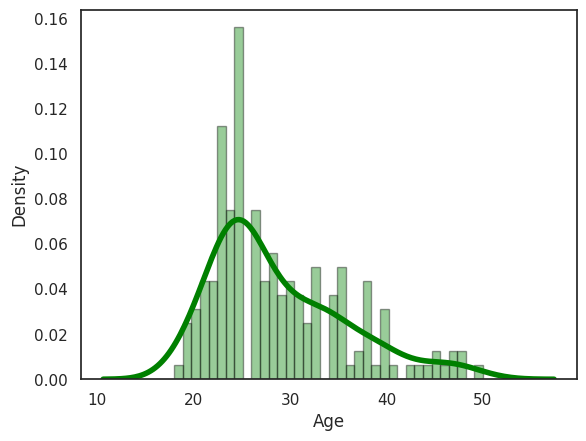

In [ ]:
# Observing the age wise data to create bins
sns.distplot(df['Age'], hist=True, kde=True,
bins=int(36), color = 'green',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

<ipython-input-173-6d068f966463>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], hist=True, kde=True,


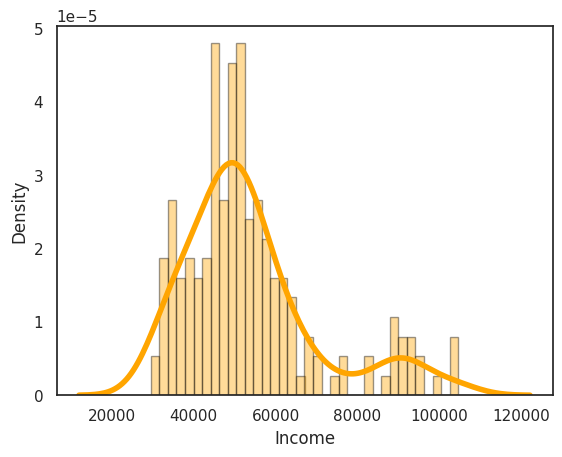

In [ ]:
# Observing the Income wise data to create bins
sns.distplot(df['Income'], hist=True, kde=True,
bins=int(36), color = 'orange',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

<ipython-input-174-45b75a9876c2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], hist=True, kde=True,


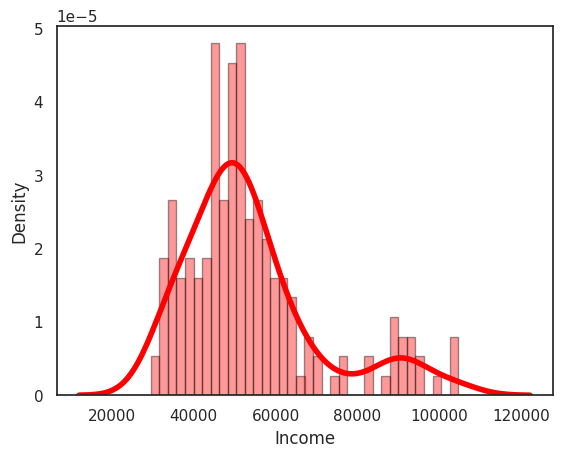

In [ ]:
# Observing the Fitness wise data to create bins
sns.distplot(df['Income'], hist=True, kde=True,
bins=int(36), color = 'red',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [ ]:
df['age_by_decade'] = pd.cut(x=df['Age'], bins=[17, 20,29, 39, 50], labels=['Teens','20s', '30s', '40s'])
df['Income_Class'] = pd.cut(x=df['Income'], bins=[29000, 35000, 60000, 85000,105000], labels=['Low Income','Lower-middle income','Upper-Middle income', 'High income'])

df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_by_decade,Income_Class
0,KP281,18,Male,14,Single,3,4,29562,112,Teens,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Teens,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teens,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Teens,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teens,Lower-middle income
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,40s,Upper-Middle income
176,KP781,42,Male,18,Single,5,4,89641,200,40s,High income
177,KP781,45,Male,16,Single,5,5,90886,160,40s,High income
178,KP781,47,Male,18,Partnered,4,5,104581,120,40s,High income


In [ ]:
df['FitnessCategory'] = df.Fitness
df["FitnessCategory"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_by_decade,Income_Class,FitnessCategory
0,KP281,18,Male,14,Single,3,4,29562,112,Teens,Low Income,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Teens,Low Income,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teens,Low Income,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Teens,Low Income,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teens,Lower-middle income,Bad Shape
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,40s,Upper-Middle income,Excellent Shape
176,KP781,42,Male,18,Single,5,4,89641,200,40s,High income,Good Shape
177,KP781,45,Male,16,Single,5,5,90886,160,40s,High income,Excellent Shape
178,KP781,47,Male,18,Partnered,4,5,104581,120,40s,High income,Excellent Shape


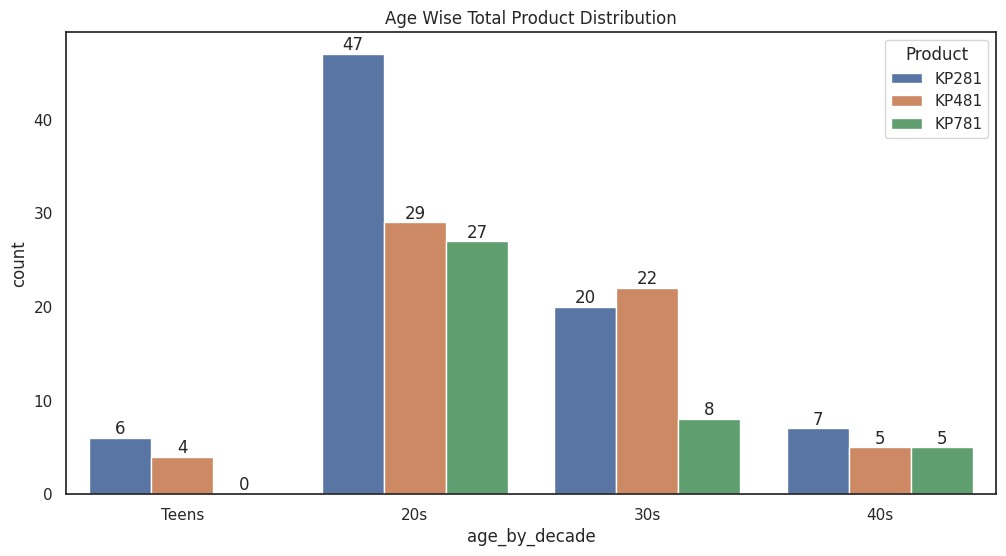

In [ ]:
# Age wise Total Product Distribution

plt.figure(figsize=(12,6))
ax = sns.countplot(x='age_by_decade', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Age Wise Total Product Distribution')
plt.show()

Insight: - People of age group 20-25 purchase more number of treadmills. - 80% of purchasers are from 20 to 35 age group. - 62% of purchases are from age group of 20-30 years.

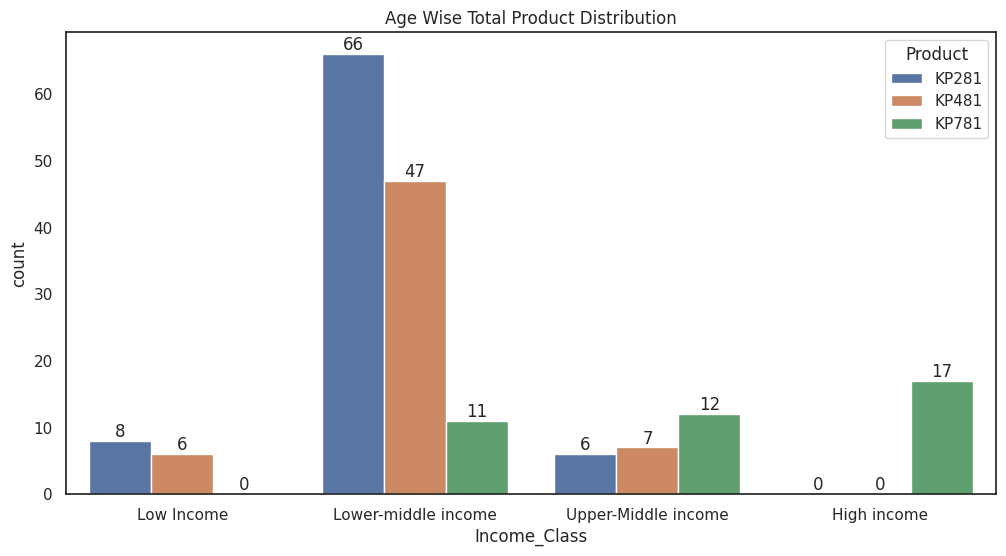

In [ ]:
# Income wise Total Product Distribution

plt.figure(figsize=(12,6))
ax = sns.countplot(x='Income_Class', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Age Wise Total Product Distribution')
plt.show()

Insight: -

* People who had lower middle income usually prefer KP281 treadmill followed by KP481.
* People who had upper middle income usually prefer to buy KP781 treadmill over KP281 & KP481.
* People who had High Income only perfer KP781 treadmill.
* People with low income perfer KP281 and KP481 treadmill.




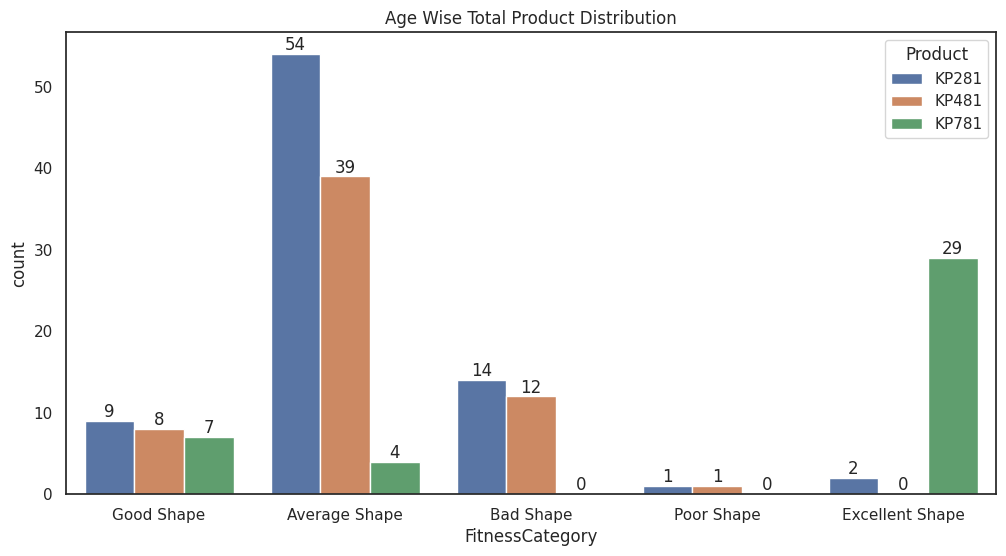

In [ ]:
# Fitness wise Total Product Distribution

plt.figure(figsize=(12,6))
ax = sns.countplot(x='FitnessCategory', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Age Wise Total Product Distribution')
plt.show()

**Observation**
*   There are 180 rows and 9 columns.   
*   There are no missing values in data.
*   There are 3 unique products in the data.  
*   Minimum and Maximum age of the person is 18 & 50, mean is 28.79 and 75% of the persons have age less than or equal to 33.
*   Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.  
*   Average rating is 3.3 on a scale of 1 to 5.  
*   Out of 180 data of gender, 104 persons are male and rest 76 person are female.  
*   Most of the prople are having 16 years of eductaion i.e 50% & 75% of the persons are having education less than equal to 16 years.
*   Product name KP281 is the most frequent product with values is 80.
*   Frequency of Material Status 'Partnered' is 107 out of 180.   
*   Standard deviation for columns Income & Miles are very high, so these variable must be outliers.
*    Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.
*   Most customer earns around 58K USD annually, with maximum of 104K USD and minimum almost 30K USD.
*   Huge difference in income for customers who purchase treadmills. Ranging between USD 29562 to 104581.

# 2. Non-Graphical Analysis: Value counts and unique attributes.

In [ ]:
FitnessCategory_count = df['FitnessCategory'].value_counts().reset_index()
FitnessCategory_count.columns = ['FitnessCategory', 'Count']
FitnessCategory_count

,FitnessCategory,Count
0,Average Shape,97
1,Excellent Shape,31
2,Bad Shape,26
3,Good Shape,24
4,Poor Shape,2


In [ ]:
age_by_decade_count = df['age_by_decade'].value_counts().reset_index()
age_by_decade_count.columns = ['age_by_decade', 'Count']
age_by_decade_count

,age_by_decade,Count
0,20s,103
1,30s,50
2,40s,17
3,Teens,10


In [ ]:
Income_Class_count = df['Income_Class'].value_counts().reset_index()
Income_Class_count.columns = ['Income_Class', 'Count']
Income_Class_count

,Income_Class,Count
0,Lower-middle income,124
1,Upper-Middle income,25
2,High income,17
3,Low Income,14


In [ ]:
df.describe(include='object')

,FitnessCategory
count,180
unique,5
top,Average Shape
freq,97


In [ ]:
df1 = df.groupby('Product')['age_by_decade'].value_counts()
df1 = pd.DataFrame(df1)
df1

age_by_decade
Product age_by_decade               
KP281   20s                       47
        30s                       20
        40s                        7
        Teens                      6
KP481   20s                       29
        30s                       22
        40s                        5
        Teens                      4
KP781   20s                       27
        30s                        8
        40s                        5
        Teens                      0

In [ ]:
df2 = df.groupby('Product')['Fitness'].value_counts()
df2 = pd.DataFrame(df2)
df2

Fitness
Product Fitness         
KP281   3             54
        2             14
        4              9
        5              2
        1              1
KP481   3             39
        2             12
        4              8
        1              1
KP781   5             29
        4              7
        3              4

In [ ]:
df3 = df.groupby('Product')['Income_Class'].value_counts()
df3 = pd.DataFrame(df3)
df3

Income_Class
Product Income_Class                     
KP281   Lower-middle income            66
        Low Income                      8
        Upper-Middle income             6
        High income                     0
KP481   Lower-middle income            47
        Upper-Middle income             7
        Low Income                      6
        High income                     0
KP781   High income                    17
        Upper-Middle income            12
        Lower-middle income            11
        Low Income                      0

# 3. Visual Analysis - Univariate & Bivariate

#3.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

In [ ]:
# Univariant Analysis
# Frequency of each feature in percentage.
def cat_analysis(df, colnames, nrows,mcols,width,height):
  fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
  fig.set_facecolor(color = 'lightgrey')
  string = "Frequency of "
  for colname in colnames:
      count = (df[colname].value_counts(normalize=True)*100)
      string += colname + ' in (%)'
      count.plot.bar(color=sns.color_palette("dark"),fontsize=6,ax=ax[0])
      ax[0].set_ylabel(string, fontsize=8,family = "sans-serif")
      ax[0].set_xlabel(colname, fontsize=10,family = "sans-serif")
      count.plot.pie(colors = sns.color_palette("dark"),autopct='%0.2f%%',
                      textprops={'fontsize': 10,'family':"sans-serif"},fontsize = 10,ax=ax[1])

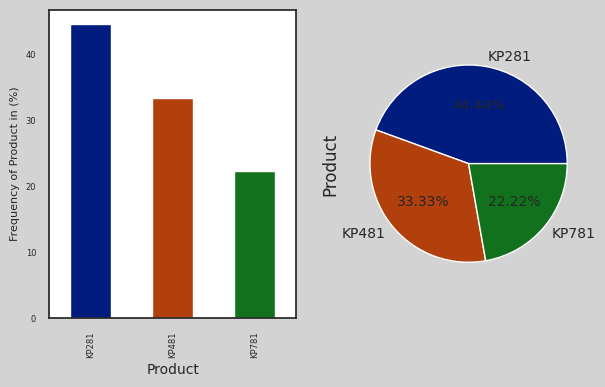

In [ ]:
cat_colnames = ['Product']
cat_analysis(df,cat_colnames,1,2,7,4)

**Model KP281 is the best-selling product.**
*   44.44% of customers bought KP281 product type.  
*   33.33% of customers bought KP481 product type.  
*   22.22% of customers bought KP781 product type.  


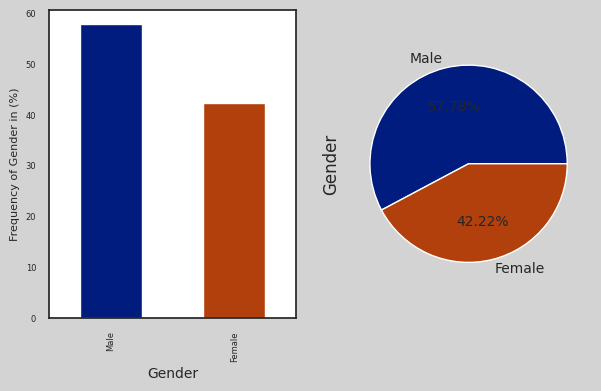

In [ ]:
cat_colnames = ['Gender']
cat_analysis(df,cat_colnames,1,2,7,4)

*   57.78% of customers are Male and 42.22% customers are Female.  

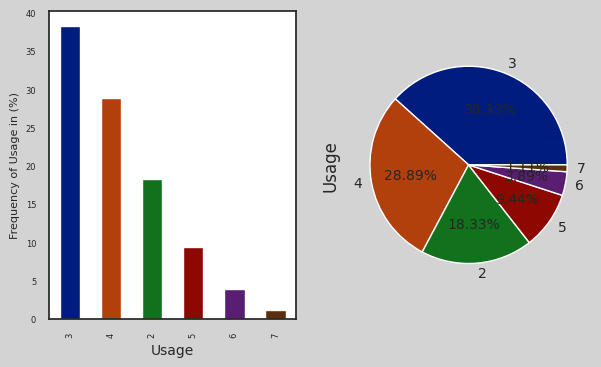

In [ ]:
cat_colnames = ['Usage']
cat_analysis(df,cat_colnames,1,2,7,4)

*   Around 39% of customers use 3 days per week.   
*   Less than 2% of customers use 7 days per week.

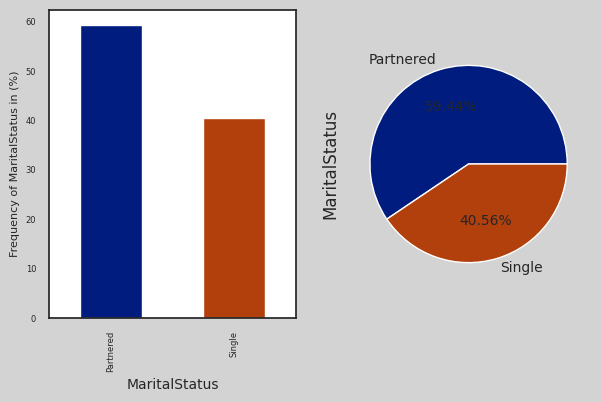

In [ ]:
cat_colnames = ['MaritalStatus']
cat_analysis(df,cat_colnames,1,2,7,4)

*   The treadmills are more likely to be purchased by married people
*   59.44% of customers are Married/Partnered.
*   40.56% of customers are Single.  

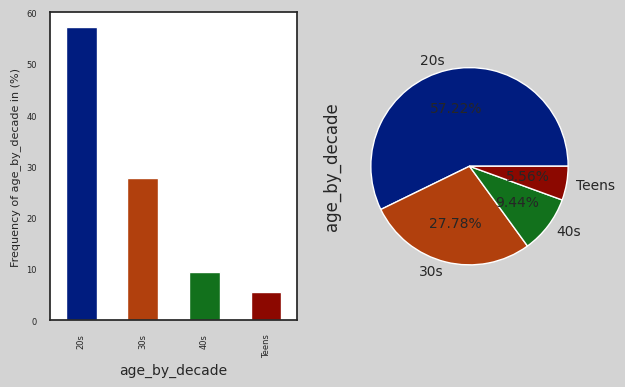

In [ ]:
cat_colnames = ['age_by_decade']
cat_analysis(df,cat_colnames,1,2,7,4)

*   88% of treadmills are purchased by customers aged 20 to 40.
*   Around 61.11% of customers age between 20 & 30.
*   5.56% Teens customers is lowest.

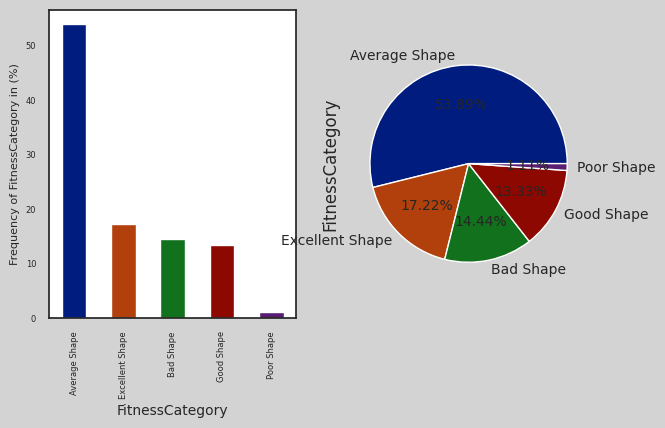

In [ ]:
cat_colnames = ['FitnessCategory']
cat_analysis(df,cat_colnames,1,2,7,4)

*   Customer with fitness level 3(Average Shape) buy major chuck of treadmills. (53.89%).
*   Around 17% of customers fitness are Excellent Shape.
*   1.11% of customers fitness are Poor Shape.  

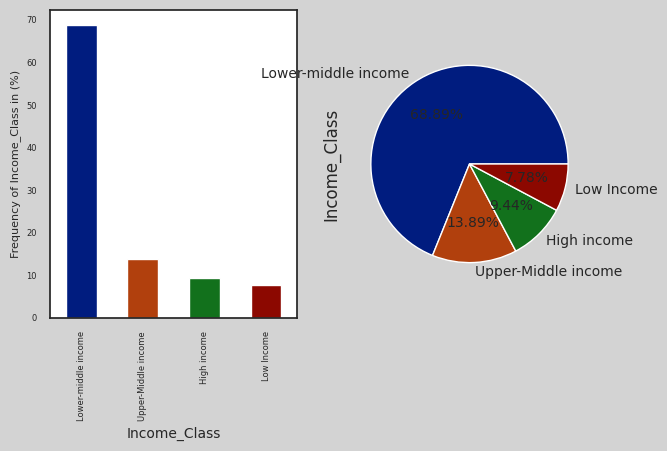

In [ ]:
cat_colnames = ['Income_Class']
cat_analysis(df,cat_colnames,1,2,7,4)

*   83% of treadmills are bought by customers with incomes between USD dollars 35000-60000, and USD dollars 60,000-85000.
*   88% of treadmills are purchased by customers age of 20 to 40.

#3.2 For categorical variable(s): Boxplot

In [ ]:
#Multi-variant Analysis
def num_mult_analysis(df,colname,category,groupby,nrows,mcols,width,height):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    fig.set_facecolor("lightgreen")
    rows = 0
    for var in colname:
        sns.boxplot(x = category,y = var, hue = groupby,data = df,ax=ax[rows][0])
        sns.pointplot(x=df[category],y=df[var],hue=df[groupby],ax=ax[rows][1])
        ax[rows][0].set_ylabel(var, fontweight="bold",fontsize=8,family = "sans-serif")
        ax[rows][0].set_xlabel(category,fontweight="bold", fontsize=8,family = "sans-serif")
        ax[rows][0].legend(title=var,fontsize=8,title_fontsize=8)
        ax[rows][0].tick_params(rotation=30,labelsize=8)
        ax[rows][1].set_ylabel(var, fontweight="bold",fontsize=8,family = "sans-serif")
        ax[rows][1].set_xlabel(category,fontweight="bold", fontsize=8,family = "sans-serif")
        ax[rows][1].legend(title=var,fontsize=8,title_fontsize=8)
        ax[rows][1].tick_params(rotation=30,labelsize=8)
        rows += 1
    plt.show()

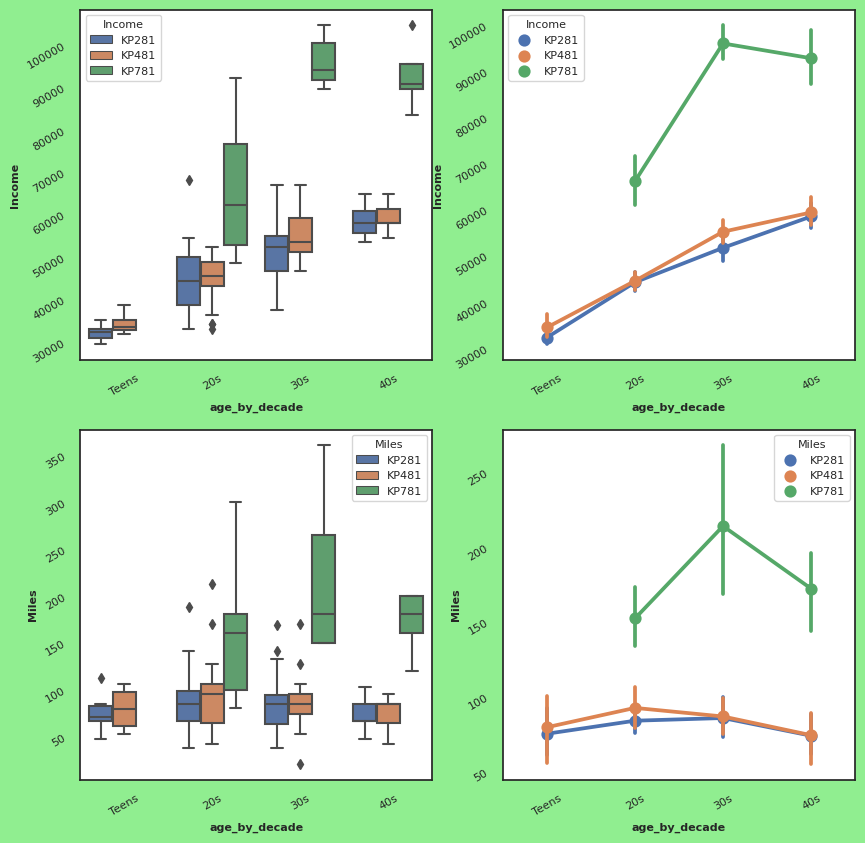

In [ ]:
col_num = ['Income','Miles']
num_mult_analysis(df,col_num,"age_by_decade","Product",2,2,10,10)

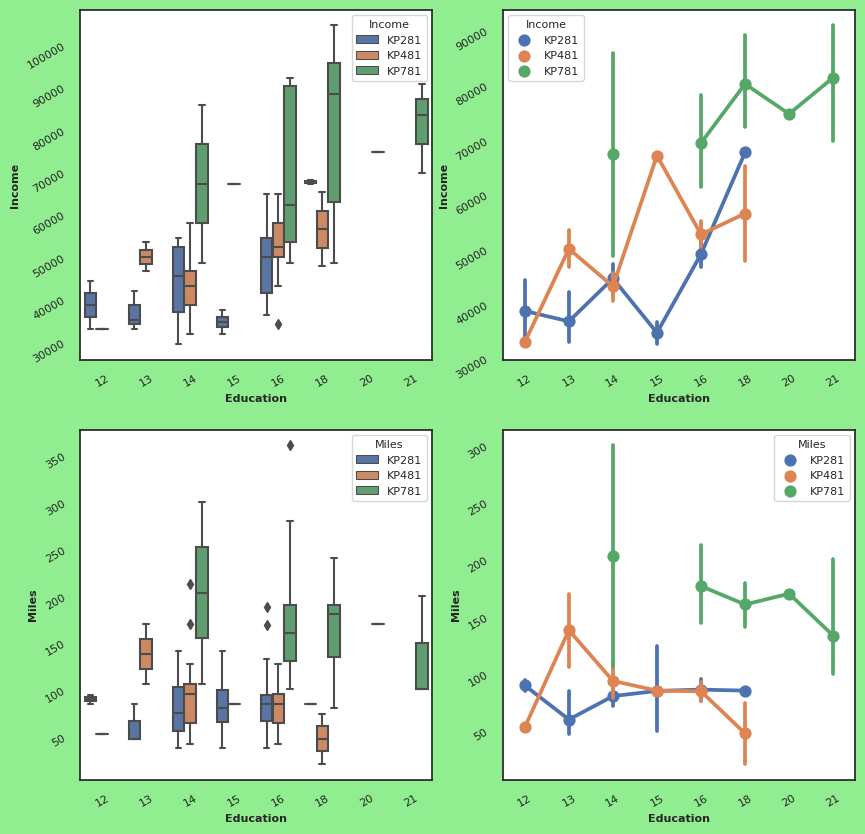

In [ ]:
col_num = ['Income','Miles']
num_mult_analysis(df,col_num,"Education","Product",2,2,10,10)

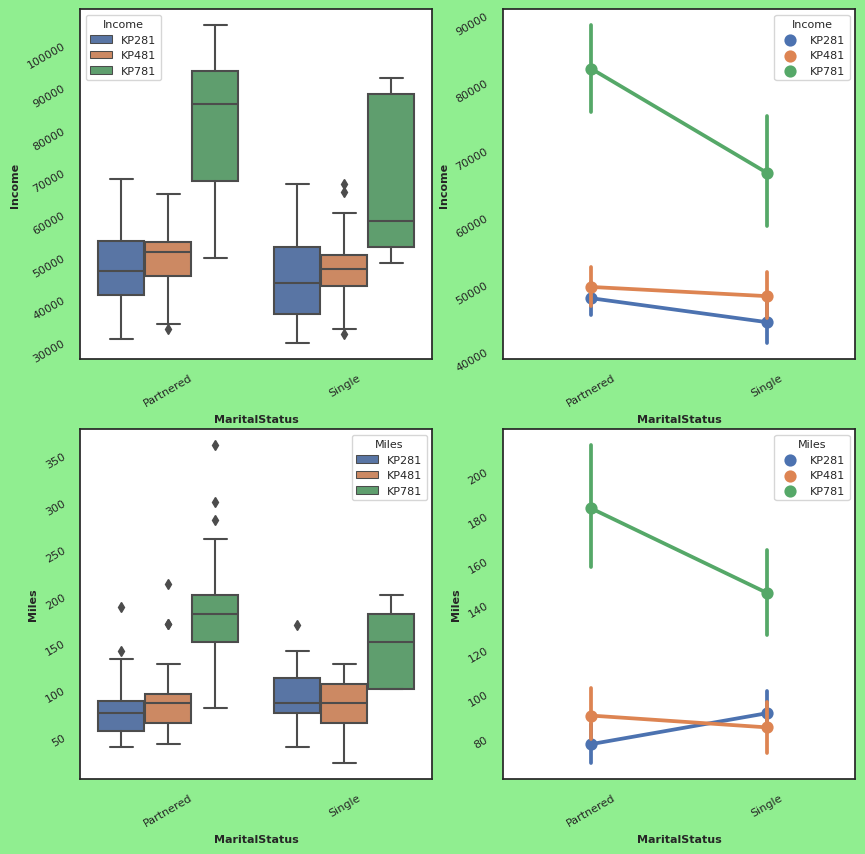

In [ ]:
col_num = ['Income','Miles']
num_mult_analysis(df,col_num,"MaritalStatus","Product",2,2,10,10)

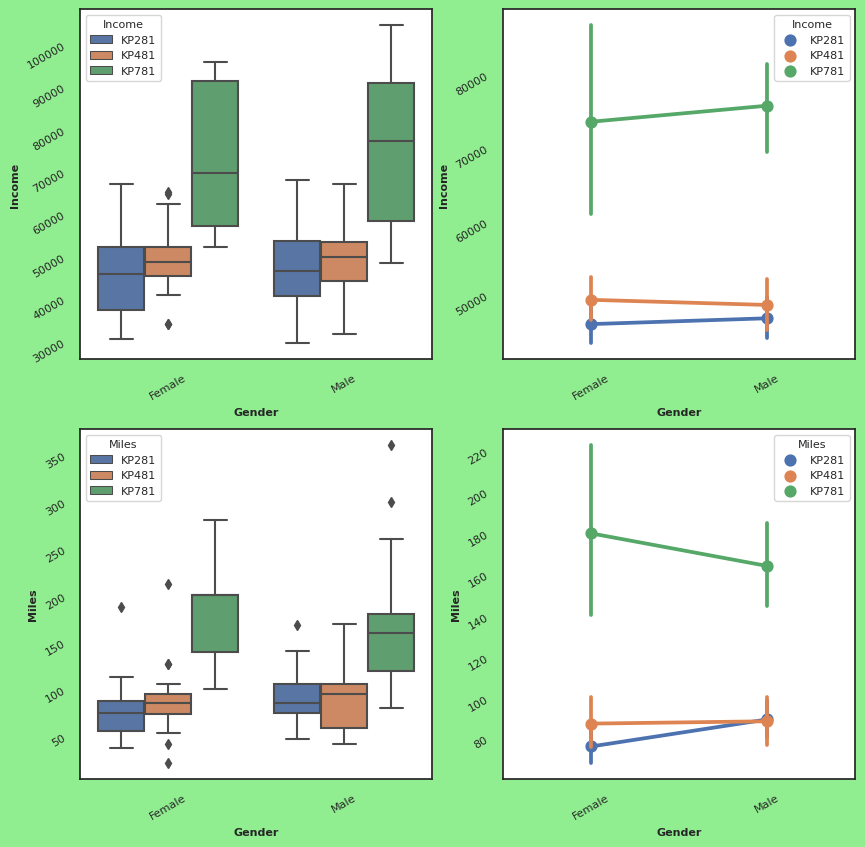

In [ ]:
col_num = ['Income','Miles']
num_mult_analysis(df,col_num,"Gender","Product",2,2,10,10)

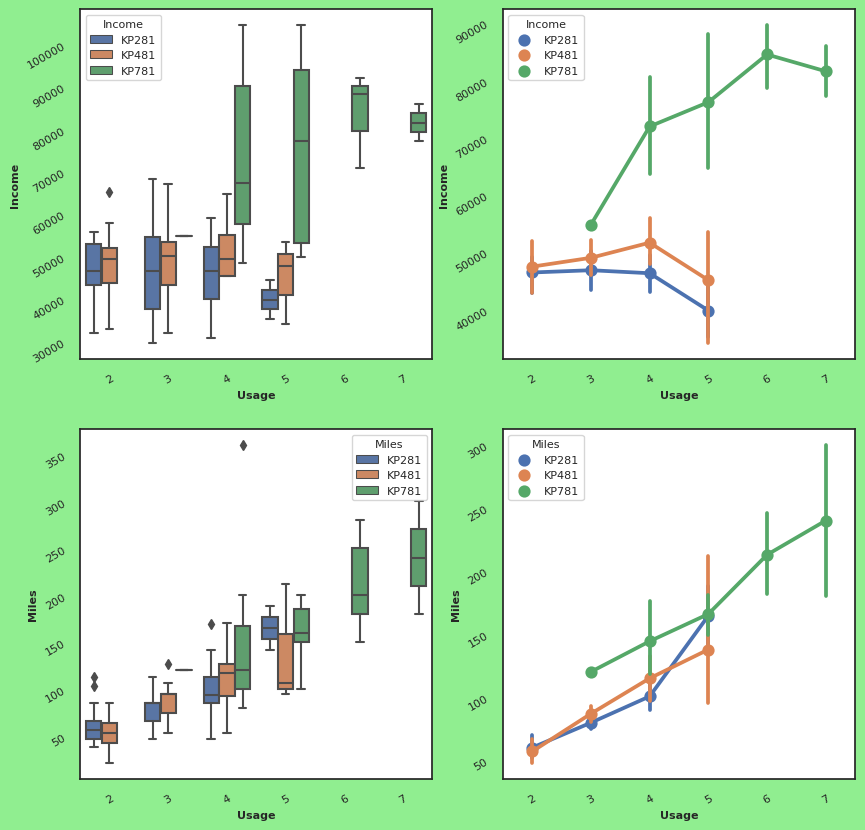

In [ ]:
col_num = ['Income','Miles']
num_mult_analysis(df,col_num,"Usage","Product",2,2,10,10)

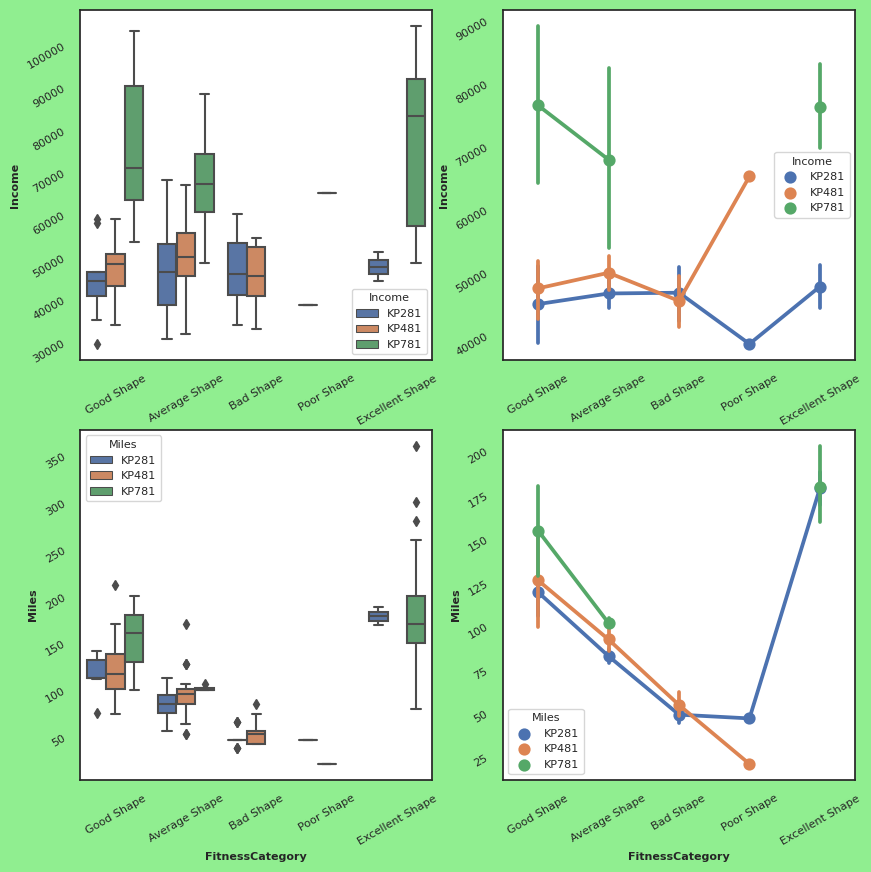

In [ ]:
col_num = ['Income','Miles']
num_mult_analysis(df,col_num,"FitnessCategory","Product",2,2,10,10)

**Bi-variant Analysis**

In [ ]:
def cat_bi_analysis(df,colname,depend_var,nrows,mcols,width,height):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    string = " based Distribution"
    for var in colname:
        string = var + string
        sns.countplot(data=df, x=depend_var, hue=var, palette="bright", ax=ax[0])
        ax[0].set_title(string,  fontweight="bold",fontsize=10,family = "sans-serif")
        ax[0].set_xlabel(depend_var,fontweight="bold", fontsize=9,family = "sans-serif")
        ax[0].set_ylabel('count', fontweight="bold",fontsize=9,family = "sans-serif")
        ax[0].legend(title=var,fontsize=8,title_fontsize=8)
        ax[0].tick_params(rotation=30,labelsize=8)
        sns.countplot(data=df, x=var, hue=depend_var, palette="bright", ax=ax[1])
        ax[1].set_title(string, fontweight="bold",fontsize=10,family = "sans-serif")
        ax[1].set_xlabel(var,fontweight="bold", fontsize=9,family = "sans-serif")
        ax[1].set_ylabel('count', fontweight="bold",fontsize=9,family = "sans-serif")
        ax[1].legend(title=depend_var,fontsize=8,title_fontsize=8)
        ax[1].tick_params(rotation=30,labelsize=8)

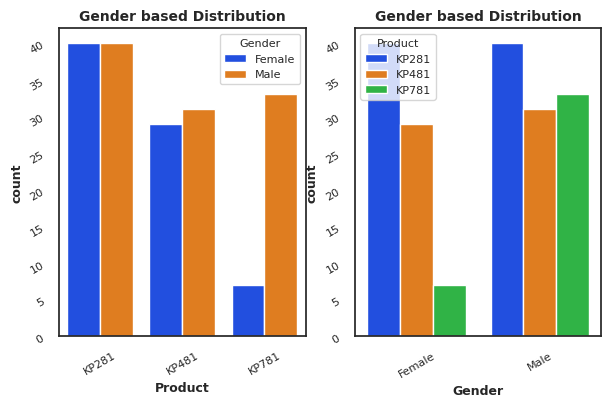

In [ ]:
col_names = ['Gender']
cat_bi_analysis(df,col_names,'Product',1,2,7,4)

*   KP781 model is the most popular among males.
*   KP281 is equally preferred by men and women.

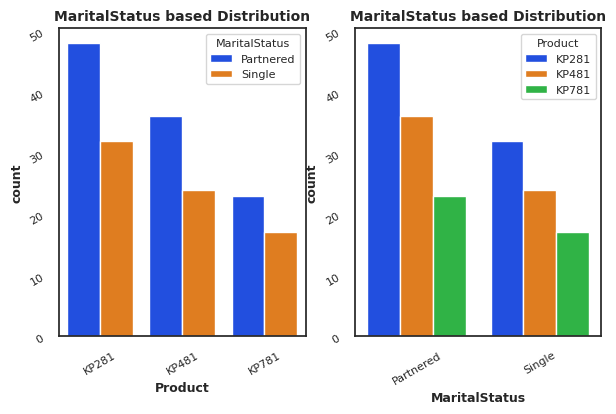

In [ ]:
col_names = ['MaritalStatus']
cat_bi_analysis(df,col_names,'Product',1,2,7,4)

*   Customer who is partnered, is more likely to purchase the product and almost same for all products.
*   KP281 is more preferred by single & partnered.

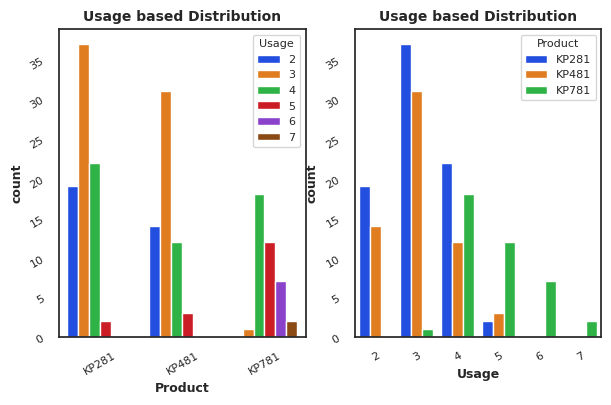

In [ ]:
col_names = ['Usage']
cat_bi_analysis(df,col_names,'Product',1,2,7,4)

*   KP281 & KP 481 are more preferred by customer who uses the product 3 weeks.
*   KP281 is more preferred by cutomers who uses 2,3 & weeks.

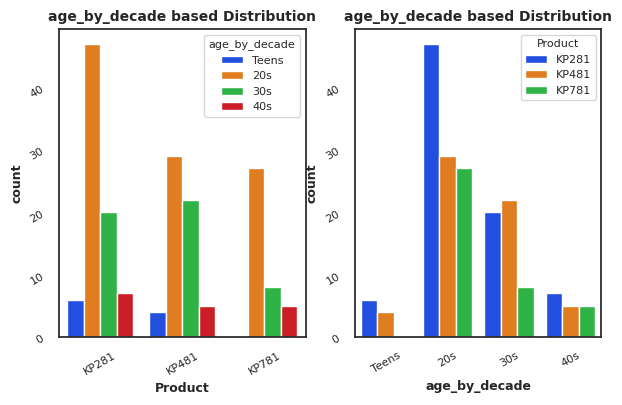

In [ ]:
col_names = ['age_by_decade']
cat_bi_analysis(df,col_names,'Product',1,2,7,4)

* The most useful treadmills product for people over 40s is the KP281.However, they buy fewer treadmills is KP781.
* The most Treadmill product are sold to 20s and 30s.


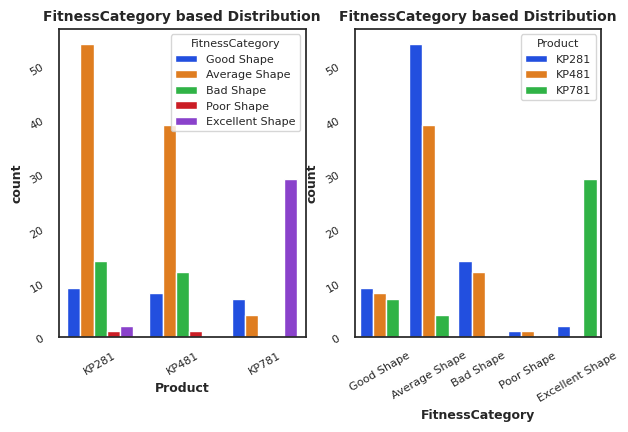

In [ ]:
col_names = ['FitnessCategory']
cat_bi_analysis(df,col_names,'Product',1,2,7,4)

*   Customers with 5 fitness level prefer using KP781.(High end Model).
*   With moderate fitness level , customer prefer using KP281.

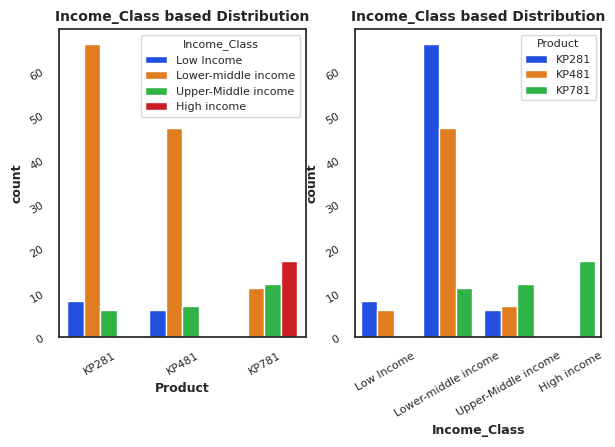

In [ ]:
col_names = ['Income_Class']
cat_bi_analysis(df,col_names,'Product',1,2,7,4)

*   Customer with high income only buy high end model. (KP781)
*   Customer with lower middle income mostly buy one of the two models. (KP281,KP481)

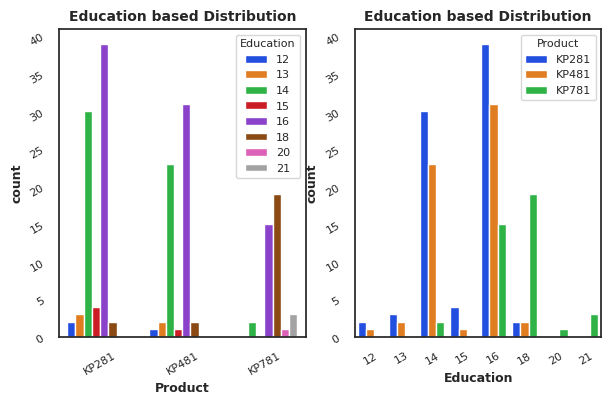

In [ ]:
col_names = ['Education']
cat_bi_analysis(df,col_names,'Product',1,2,7,4)

*   Customer above 20 years education, purchase only KP781 model.



# 3.3 For correlation: Heatmaps, Pairplots

<ipython-input-135-569415ed5d51>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

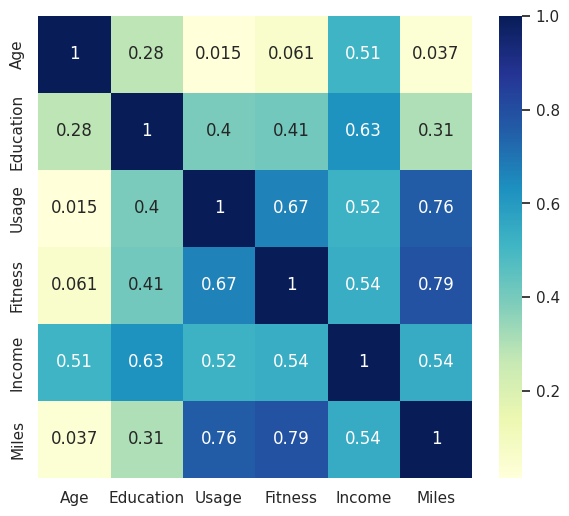

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

**INSIGHTS**
*  Miles and Fitness and Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.

* Income and education show a strong correlation. High-income and highly educated people prefer high-end models, as mentioned during Bivariant analysis of Categorical variables.

* There is no corelation between Usage & Age or Fitness & Age which mean Age should not be barrier to use treadmills or specific model of treadmills.

  



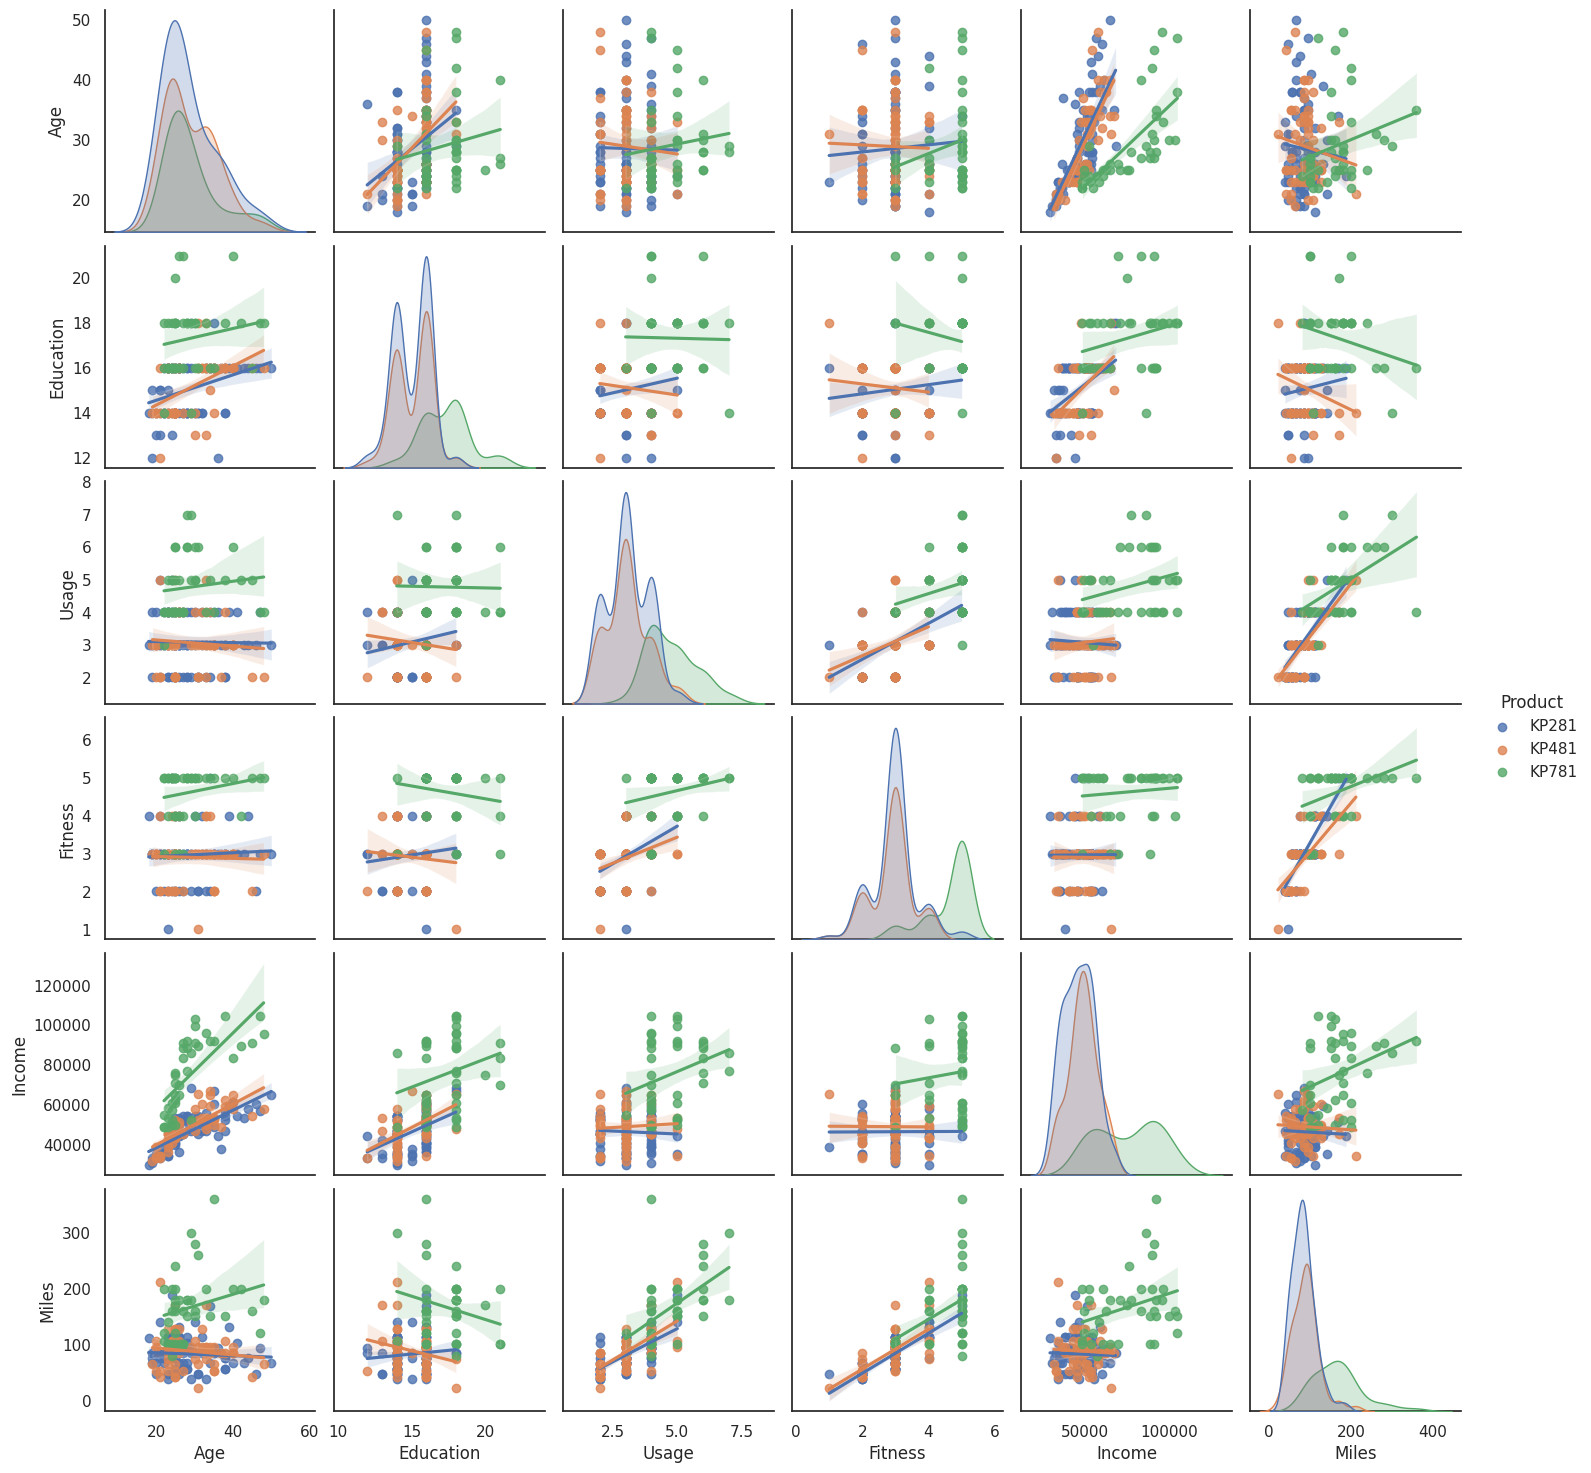

In [ ]:
# Product Analysis - Pair Plot
sns.pairplot(df,hue='Product',kind='reg')
plt.show()

**INSIGHTS**

*  Gender did not have any such correlation with other parameter that meens it did not impact on purchaing.

* Eductaion is highly correlated with income as its obvious. It also has impact on product purchased. Eductation also have significatnt correlation between fitness rating and Usage of the treadmill.

* Marital Status has smaller correlation between Age and Income.

* Usage is extremely correlated with Fitness and Miles and has a higher correlation with Income and Education as well.

* Income is highly correlated with Product and Education. It also had good correlation with Age, usage, Fitness, Miles.

* From above we can say that Product is extremely correlated with Income, Education, Fitness, Usage along with Miles.

* We can say that Age and Education are indicator of Income which affect the product bought. The more advance the Product is the more its Usage and hence more the miles run which result into imroved Fitness rating.    



# 4. Missing Value & Outlier Detection

In [ ]:
# Checking Missing Value
def missingValue(df):
    # Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total Records = ", df.shape[0])

    md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return md
print("Total Columns = ", df.shape[1])
missingValue(df)

Total Columns =  12
Total Records =  180


,Total Missing,In Percent
Product,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
MaritalStatus,0,0.0
Usage,0,0.0
Fitness,0,0.0
Income,0,0.0
Miles,0,0.0
age_by_decade,0,0.0


In [ ]:
# Function for Outlier detection
# Box plot - for checking range of outliers
# distplot - For checking skewness
def outlier_detect(df,colname,nrows,mcols,width,height):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightpink")
    rows = 0
    for var in colname:
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=6,family = "sans-serif")
        sns.boxplot(y = df[var],color='m',ax=ax[rows][0])
        sns.distplot(df[var],color='m',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='g', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

<ipython-input-141-74fcfed86ee8>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],color='m',ax=ax[rows][1])
<ipython-input-141-74fcfed86ee8>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],color='m',ax=ax[rows][1])


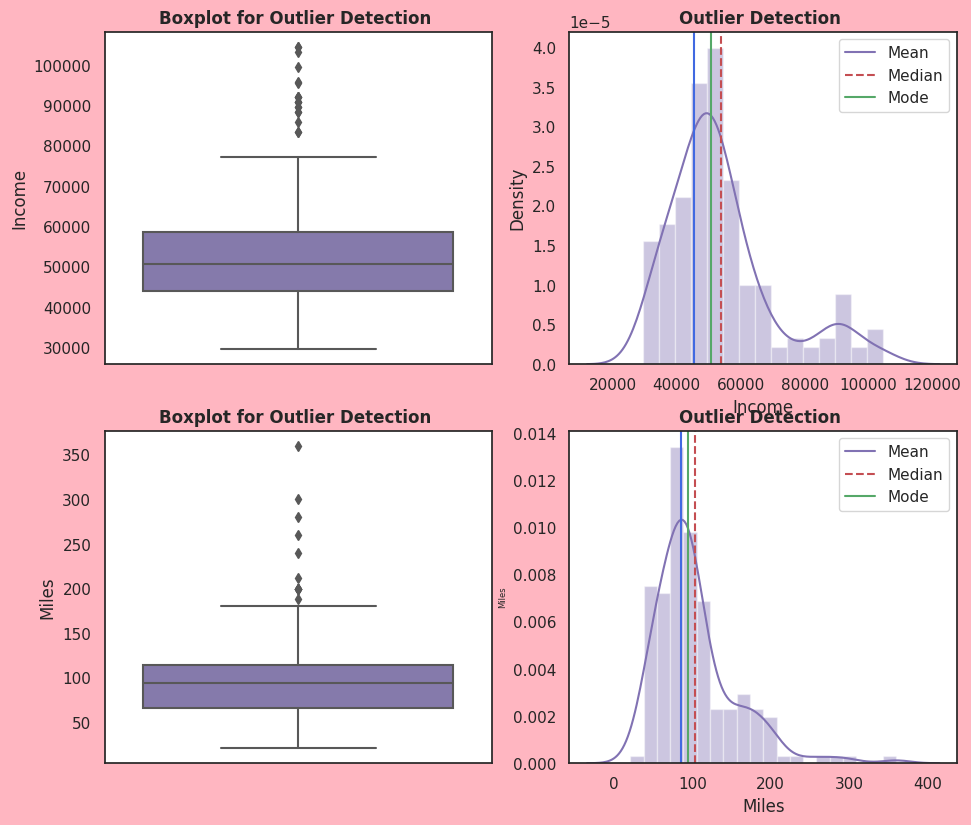

In [ ]:
col_name = [ 'Income', 'Miles']
outlier_detect(df,col_name,2,2,11,9.5)


**INSIGHTS**
*   Both Miles and Income have significant outliers based on the above boxblot.
*   Also both are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.
*   Majority of Customers fall within the USD 45,000 - USD 60,000 range, There are outliers over USD 85,000.
*   Only a few of our customers run more than 180 miles per week.


**Handling Outliers**

In [ ]:
df_copy = df.copy()

In [ ]:
# Removing outliers from Income Column
# Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df_copy['Income'].quantile(0.75)
Q1 = df_copy['Income'].quantile(0.25)
IQR = Q3-Q1
df_copy = df_copy[(df_copy['Income'] > Q1 - 1.5*IQR) & (df_copy['Income'] < Q3 + 1.5*IQR)]

In [ ]:
# Removing outliers from Miles Column
# Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df_copy['Miles'].quantile(0.75)
Q1 = df_copy['Miles'].quantile(0.25)
IQR = Q3-Q1
df_copy = df_copy[(df_copy['Miles'] > Q1 - 1.5*IQR) & (df_copy['Miles'] < Q3 + 1.5*IQR)]

In [ ]:
# Checking the shape of data
print(f"Number of rows: {df_copy.shape[0]}\nNumber of columns: {df_copy.shape[1]}")

Number of rows: 147
Number of columns: 12


In [ ]:
# Checking the charectoristics of data
df_copy.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_by_decade,Income_Class,FitnessCategory
count,147,147.000000,147,147.000000,147,147.000000,147.000000,147.000000,147.000000,147,147,147
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN,4,3,5
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN,20s,Lower-middle income,Average Shape
freq,78,NaN,78,NaN,84,NaN,NaN,NaN,NaN,85,117,95
mean,NaN,28.346939,NaN,15.224490,NaN,3.115646,3.006803,48312.673469,84.190476,NaN,NaN,NaN
std,NaN,6.860302,NaN,1.338553,NaN,0.789633,0.735561,9186.420804,26.435067,NaN,NaN,NaN
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000,NaN,NaN,NaN
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,3.000000,41500.500000,66.000000,NaN,NaN,NaN
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,48891.000000,85.000000,NaN,NaN,NaN
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,3.000000,54576.000000,100.000000,NaN,NaN,NaN


<ipython-input-141-74fcfed86ee8>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],color='m',ax=ax[rows][1])
<ipython-input-141-74fcfed86ee8>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],color='m',ax=ax[rows][1])


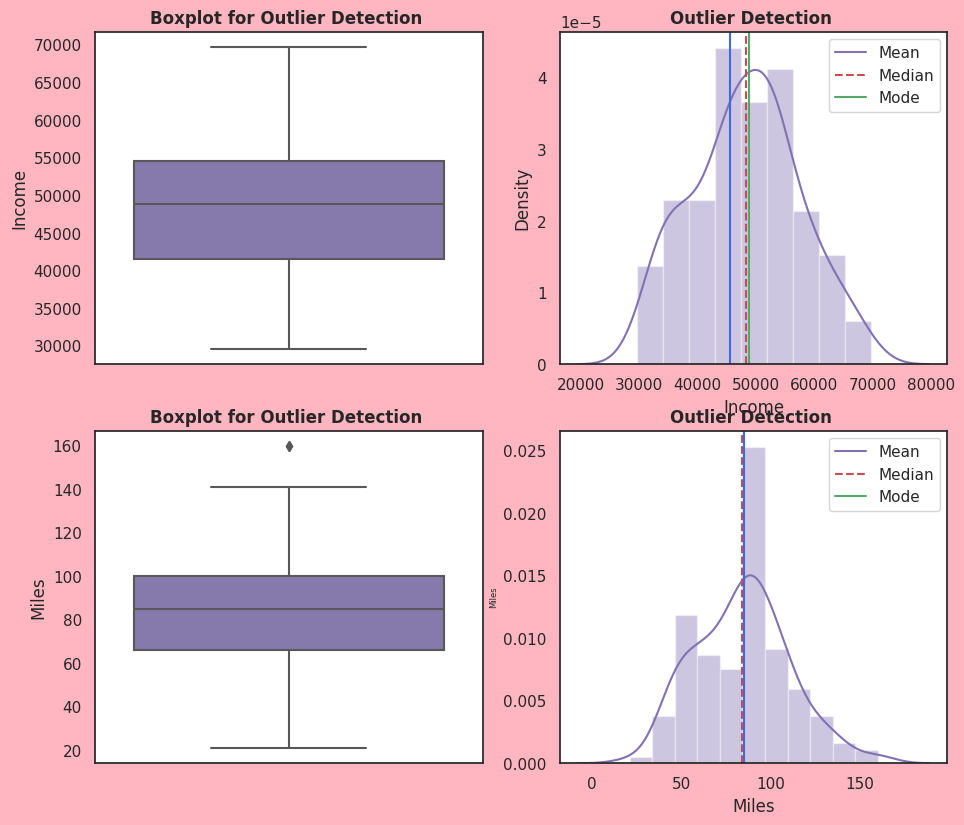

In [ ]:
col_name = [ 'Income', 'Miles']
outlier_detect(df_copy,col_name,2,2,11,9.5)



* It's true that there are outliers, but they may provide many insights for high-end models that can benefit companies more. Therefore, they should not be removed for further analysis.



# 5. Business Insights based on Non-Graphical and Visual Analysis

# Analysis using Contingency Tables to Calculate Probabilities
# (Marginal Probabilities, Joint Probabilities, Conditional Probabilities)

In [ ]:
# Marginal Probability
df.Product.value_counts(normalize=True).round(2).reset_index()

,index,Product
0,KP281,0.44
1,KP481,0.33
2,KP781,0.22


*   Probability of buying KP281, KP481 & KP781 are 0.44, 0.33 & 0.22 respectively.

In [ ]:
df.Gender.value_counts(normalize=True).round(2).reset_index()

,index,Gender
0,Male,0.58
1,Female,0.42


*   Probability of Male customer is 0.58
*   Probability of Female customer is 0.42

In [ ]:
df.MaritalStatus.value_counts(normalize=True).round(2).reset_index()

,index,MaritalStatus
0,Partnered,0.59
1,Single,0.41





*   Probability of Married/Partnered is 0.59
*   Probability of Single is 0.41

In [ ]:
pd.crosstab(df['Product'],[df['Gender']], normalize=True, margins=True, margins_name='Total').round(2)

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


**Insight: - Probability of Female purchase treadmill is 42.22%.**

* P(KP281|Female) = 22.22%
* P(KP481|Female) = 16.11%
* P(KP781|Female) = 3.88%

**Insight: - Probability of Male purchase treadmill is 58%.**

* P(KP281|Male) = 22.22%
* P(KP481|Male) = 17.22%
* P(KP781|Male) = 18.33%

In [ ]:
pd.crosstab(df['Product'],[df['MaritalStatus']], normalize=True, margins=True, margins_name='Total').round(2)

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


**Insight: - Probability of Partnered purchase treadmill is 59%.**

* P(KP281|Partnered) = 27%
* P(KP481|Partnered) = 20%
* P(KP781|Partnered) = 13%

**Insight: - Probability of Single purchase treadmill is 41%.**

* P(KP281|Single) = 18%
* P(KP481|Single) = 33%
* P(KP781|Single) = 22%

In [ ]:
pd.crosstab(df['Product'],[df['Usage']], normalize=True, margins=True, margins_name='Total').round(2)

Usage,2,3,4,5,6,7,Total
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
Total,0.18,0.38,0.29,0.09,0.04,0.01,1.00


Insight: -

Probability of people who has Usage 3 purchase treadmill is 38.33%.

* P(KP281|Usage=3) = 20.55%
* P(KP481|Usage=3) = 17.22%
* P(KP781|Usage=3) = 0.55%

Probability of people who has Usage 4 purchase treadmill is 28.88%.

* P(KP281|Usage=4) = 12.22%
* P(KP481|Usage=4) = 6.66%
* P(KP781|Usage=4) = 10.00%

In [ ]:
pd.crosstab(df['Product'],[df['Education']], normalize=True, margins=True, margins_name='Total').round(2)

Education,12,13,14,15,16,18,20,21,Total
Product,,,,,,,,,
KP281,0.01,0.02,0.17,0.02,0.22,0.01,0.00,0.00,0.44
KP481,0.01,0.01,0.13,0.01,0.17,0.01,0.00,0.00,0.33
KP781,0.00,0.00,0.01,0.00,0.08,0.11,0.01,0.02,0.22
Total,0.02,0.03,0.31,0.03,0.47,0.13,0.01,0.02,1.00


In [ ]:
pd.crosstab(df['Product'],[df['age_by_decade']], normalize=True, margins=True, margins_name='Total').round(2)

age_by_decade,Teens,20s,30s,40s,Total
Product,,,,,
KP281,0.03,0.26,0.11,0.04,0.44
KP481,0.02,0.16,0.12,0.03,0.33
KP781,0.00,0.15,0.04,0.03,0.22
Total,0.06,0.57,0.28,0.09,1.00


In [ ]:
pd.crosstab(df['Product'],[df['Income_Class']], normalize=True, margins=True, margins_name='Total').round(2)

Income_Class,Low Income,Lower-middle income,Upper-Middle income,High income,Total
Product,,,,,
KP281,0.04,0.37,0.03,0.00,0.44
KP481,0.03,0.26,0.04,0.00,0.33
KP781,0.00,0.06,0.07,0.09,0.22
Total,0.08,0.69,0.14,0.09,1.00


In [ ]:
pd.crosstab(df['Product'],[df['Fitness']], normalize=True, margins=True, margins_name='Total').round(2)

Fitness,1,2,3,4,5,Total
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
Total,0.01,0.14,0.54,0.13,0.17,1.00


Insight: -

Probability of people who has Fitness 3 purchase treadmill is 53.88%.

* P(KP281|Fitness=3) = 30.00%
* P(KP481|Fitness=3) = 21.66%
* P(KP781|Fitness=3) = 2.22%

Probability of people who has Fitness 4 purchase treadmill is 13.33%.

* P(KP281|Fitness=4) = 5.00%
* P(KP481|Fitness=4) = 4.44%
* P(KP781|Fitness=4) = 3.88%

Probability of people who has Fitness 5 purchase treadmill is 17.22%.

* P(KP281|Fitness=5) = 1.11%
* P(KP481|Fitness=5) = 0%
* P(KP781|Fitness=5) = 16.11%

In [ ]:
round(pd.crosstab(index=[df.Product,df.FitnessCategory],columns=df.Gender,normalize=True)*100,2)

Gender                   Female   Male
Product FitnessCategory               
KP281   Average Shape     14.44  15.56
        Bad Shape          5.56   2.22
        Excellent Shape    0.56   0.56
        Good Shape         1.67   3.33
        Poor Shape         0.00   0.56
KP481   Average Shape     10.00  11.67
        Bad Shape          3.33   3.33
        Good Shape         2.22   2.22
        Poor Shape         0.56   0.00
KP781   Average Shape      0.56   1.67
        Excellent Shape    2.78  13.33
        Good Shape         0.56   3.33

In [ ]:
round(pd.crosstab(index=[df.Product,df.MaritalStatus],columns=df.Gender,normalize=True),2)

Gender                 Female  Male
Product MaritalStatus              
KP281   Partnered        0.15  0.12
        Single           0.07  0.11
KP481   Partnered        0.08  0.12
        Single           0.08  0.06
KP781   Partnered        0.02  0.11
        Single           0.02  0.08

In [ ]:
round(pd.crosstab(index=[df.Product,df.Usage],columns=df.Gender,normalize=True),2)

Gender         Female  Male
Product Usage              
KP281   2        0.07  0.03
        3        0.11  0.10
        4        0.04  0.08
        5        0.01  0.01
KP481   2        0.04  0.04
        3        0.08  0.09
        4        0.03  0.04
        5        0.02  0.00
KP781   3        0.00  0.01
        4        0.01  0.09
        5        0.02  0.05
        6        0.01  0.03
        7        0.00  0.01

In [ ]:
round(pd.crosstab(index=[df.Product,df.age_by_decade],columns=df.Gender,normalize=True),2)

Gender                 Female  Male
Product age_by_decade              
KP281   Teens            0.01  0.02
        20s              0.14  0.12
        30s              0.05  0.06
        40s              0.02  0.02
KP481   Teens            0.01  0.02
        20s              0.08  0.08
        30s              0.07  0.06
        40s              0.01  0.02
KP781   20s              0.03  0.12
        30s              0.01  0.03
        40s              0.00  0.03

In [ ]:
round(pd.crosstab(index=[df.Product,df.Income_Class],columns=df.Gender,normalize=True),2)

Gender                       Female  Male
Product Income_Class                     
KP281   Low Income             0.02  0.02
        Lower-middle income    0.18  0.19
        Upper-Middle income    0.02  0.01
KP481   Low Income             0.01  0.02
        Lower-middle income    0.13  0.13
        Upper-Middle income    0.02  0.02
KP781   Lower-middle income    0.01  0.05
        Upper-Middle income    0.01  0.06
        High income            0.02  0.08

Insight:

In all the tables, we can observe the last row named All, which consists of the overall probabilities of purchases of those 3 treadmills, which is as follows:

* Probability of purchase of KP281 = 44.44%
* Probability of purchase of KP481 = 33.33%
* Probability of purchase of KP781 = 22.22%

# Customer Profiling

Customer for KP281 Treadmill is

* Age = 20 to 40 years
* Education Level = 14 & 16 years
* Annual Income = Below $70,000
* Fitness Rating = 2 & 3
* Usage = 2 to 4 times in each week
* Miles = Below 150 miles the customer expects to walk/run each week

Customer for KP481 Treadmill is

* Age = 20 to 40 years
* Education Level = 14 & 16 years
* Annual Income = Below $70,000
* Fitness Rating = 2, 3 & 4
* Usage = 2 to 4 times in each week
* Miles = Below 150 miles the customer expects to walk/run each week

Customer for KP781 Treadmill is

* Age = 20 and Above
* Education Level = 16 & 18 years
* Annual Income = Above $45,000
* Fitness Rating = 4 & 5
* Usage = 4 to 6 times in each week
* Miles = Abow 50 miles the customer expects to walk/run each week

**INSIGHT**

* Males have high chances of purchase KP781 treadmill as 82.5% of total sale of KP781 is purchased by Males. And both are likely to purchase equal number of KP281 and KP481 treadmill.

* People with Education level less than or equal to 16 years are more likely to purchase KP281 and KP481 treadmill. And people with Education level greater than or equal to 16 years are more likely to purchase KP781 treadmill.

* People with annual Income less than or equal to $70000 are more likely to purchase KP281 and KP481 treadmill. And people with annual Income greater than or equal to &45000 are more likely to purchase KP781 treadmill.

* People with Usage less than or equal to 4 are likely to purchase KP281 and KP481 treadmill. And people with Usage greater than or equal to 4 are likely to purchase KP781 treadmill.

* People with Fitness Level 4 or less are more likely to purchase KP281 and KP481 treadmill. And people with Fitness Level 4 & 5 are more likely to purchase KP781 treadmill.

* People who use the treadmill more are more likely to purchase KP781 i.e 4 to 6 times in a week. And people who use the treadmill moderate i.e. 2 to 4 times in a week is more likely to purchase KP281 and KP481.

# 5.1 Comments on the range of attributes

*   Minimum and Maximum age of the person is 18 & 50, mean is 28.79 and 75% of the persons have age less than or equal to 33.
*   Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
*   Average rating is 3.3 on a scale of 1 to 5.
*   Out of 180 data of gender, 104 persons are male and rest of female.
*   Most of the prople are having 16 years of eductaion i.e 50% & 75% of the persons are having education less than equal to 16 years.
*   Product name KP281 is the most frequent product with values is 80.
*   Frequency of Material Status 'Partnered' is 107 out of 180.
*   Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.
*   Most customer earns around 58K USD annually, with maximum of 104K USD and minimum almost 30K USD.
*   Huge difference in income for customers who purchase treadmills. Ranging between USD 29562 to 104581.


# 5.2 Comments on the distribution of the variables and relationship between them

*   **Product vs Gender**     
      Equal number of males and females have purchased KP281 product and Almost same for the product KP481    
      Most of the Male customers have purchased the KP781 product.
*   **Product vs MaritalStatus**    
      Customer who is Partnered, is more likely to purchase the product.  
*   **Product vs Age**    
      Customers purchasing products KP281 & KP481 are having same Age median value.     
      Customers whose age lies between 25-30, are more likely to buy KP781 product.  
*   **Product vs Education**    
      Customers whose Education is greater than 16, have more chances to purchase the KP781 product.    
      While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.    
*   **Product vs Usage**    
      Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.   
      While the other customers are likely to purchasing KP281 or KP481.
*   **Product vs Fitness**   
      The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
*   **Product vs Income**    
      Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.
*   **Product vs Miles**     
      If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

# 5.3 Comments for each univariate and bivariate plot

*   **Univariate analysis**   
*   KP281 is the most commonly purchase product type.     
*   KP481 is the second most top product type purchased.    
*   KP781 is the least purchased product type.    
*   Most products purchased by couples/Married/Partnered customer category.    
*   Most products purchased by Males, females are less interested in the product compared to Males.    
*   More than 90 customers have rated their physical fitness rating as Average.    
*   Excellent shape is the second highest rating provided by the customers.    
*   Most of customers who have purchased the product have a average income between 40K to 60K.    
*   Average Income density is over 3.0.    
*   Over 1.5 density customer population have rated their physical fitness rating as Average.    
*   Second highest customer population density have rated Excellent shape as their fitness rating.    
*   More than 35 customers earn 50-55K per year.    
*   More than 30 customers earn 45-50K per year.    
*   More than 20 customers earn 55-60K per year.    
*   Highest number of customers have 16 as their Education.    
*   14 is the second highest education among the customers.    
*   20 is the least education among the customers.    
*   3 days per week is the most common usage among the customers.    
*   4 days and 2 days per week is the second and third highest usage among the customers.    
*   Very few customers use product 7 days per week.    
*   Average shape is the most rating customers have given for fitness rating.    
*   Around 40 customers have stated Excelled Shape as fitness rating.    


*   **Bivariate analysis**   
*   KP281 is the most preferred product among customers.    
*   KP481 is the second most preferred product among the customers.    
*   Between Singles and Partnered, Partnered customers are the major product purchasers.    
*   KP281 Product is the equally preferred by both male and female genders.    
*   KP781 Product is mostly preferred among the Male customers.    
*   Overall Male customers are the highest product purchasers.    
*   Partnered customers are the most buyers of aerofit product.    
*   Out of both Single and Partnered customers, Male customers are significantly high.    
*   Female customers are considerably low compared to Male customers.    
*   Among Male and Female genders, Male's usage is 4 days per week.    
*   Female customers mostly use 3 days per week.    
*   Only few Male customers use 7 days per week whereas female customer's maximum usage is only 6 days per week.    
*   Among the fitness rating both Male and Female most have rated as average.    
*   Significant number of Male customers are at Excellent shape compared to Female customers.    
*   Female customer's lack consistency after the 3 days per week.    
*   Partnered customers usage is higher than single customers.    
*   Partnered customers also have greater consistency per week of 7 days per week than single customers.    
*   Male customers are in better shape the female customers.    
*   Though Female customers do not have poor shape, they are also not in excellent shape.    
*   Some Male customers excellent body shape and few customers have poor shape as well.    
*   Male customers have a consistent distance coverage than female customers.    
*   Female customers have max distance covered as just over 300 miles.    
*   Majority of the customer Age group is between 20 to mid 30s who have rated atleast average.    
*   KP781 is more populat among the single and Partnered customers.    
*   Among the both marital status, Single female does not prefer much of the products.
*   Partnered Female bought KP781 treadmill compared to Partnered Male.
*   Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.
*   Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
*   There are more single Males buying treadmill than single Females.
*   Single Male customers bought KP781 treadmill compared to single Female.




#5.4 Customer Segments

Customer Segments based on Gender

* Inexpensive Product Segment: This segment is made up of both males and females, and they are equally likely to purchase the inexpensive product, KP281. This suggests that the inexpensive product is appealing to a broad range of customers, regardless of gender.

* Medium Price Product Segment: This segment is made up primarily of males, and they are more likely to purchase the medium price product, KP481. This suggests that the medium price product is more appealing to men than to women.

* Expensive Product Segment: This segment is made up primarily of males, and they are significantly more likely to purchase the expensive product, KP781. This suggests that the expensive product is more appealing to men than to women.

Customer Segments Based on Usage

* Casual users: These customers are not very serious about fitness and are only willing to use the treadmill a few times per week. They are most likely to purchase the KP281 or KP481 models.

* Committed users: These customers are more serious about fitness and are willing to use the treadmill 4 or 5 times per week. They are most likely to purchase the KP781 or KP481 model.

* Hardcore users: These customers are very serious about fitness and are willing to use the treadmill 6 or 7 times per week. They are also most likely to purchase the KP781 model.

Customer Segmens Based on Fitness

* Moderately Fit Customers: This segment would include customers who have purchased KP281 or KP481.

* Already Fit Customers: This segment would include customers who have purchased KP781.

Segments Based on Miles Covered

* Pepple who purchase Low range products tend to run less miles as opposed to people who tend to purchase costly products

#6. Recommendations - Actionable items for business.



*   Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more.  

*   KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.   

*   As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.

*   KP781 product should be promotted using influencers and other international atheletes.

*   Research required for expanding market beyond 50 years of age considering health pros and cons.

*   Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.

*   KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.

*   Target the Age group above 40 years to recommend Product KP781.

* Aerofit should create some awareness reagarding health and product specifically for the person with 15, 20, 21 years of education level. As there is correlation between education and income and we can see there are people with 14 years of education level bought 11 times more machine (55 machines) as compare to level 15 (5 machines).

* Aerofit should run a some reward point program to encourage customer to increase thier weekly usage of the treadmill in each week and in terms of miles customer going to walk/run. That will definately increase fitness level of the customer. Later we can ask customer to upgrade their existing machine with more featured one and for that they can redeem their reward point.

* Take advantage of the bimodal income distribution by tailoring marketing offers to both income groups. For the majority group earning between 20,000 and 80,000 per year, emphasize the affordability and long-term cost savings of Aerofit products. For the higher-income group, highlight the premium features and benefits of the more expensive KP781 product.